## CMPT 353 Project Analysis

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Get Data

In [2]:
filename = "Glassdoor Gender Pay Gap.csv"
pay_data = pd.read_csv(filename)

#Add a Salary column
pay_data['Salary'] = pay_data['BasePay'] + pay_data['Bonus']

## Preliminary Analysis

### Department by Total entries

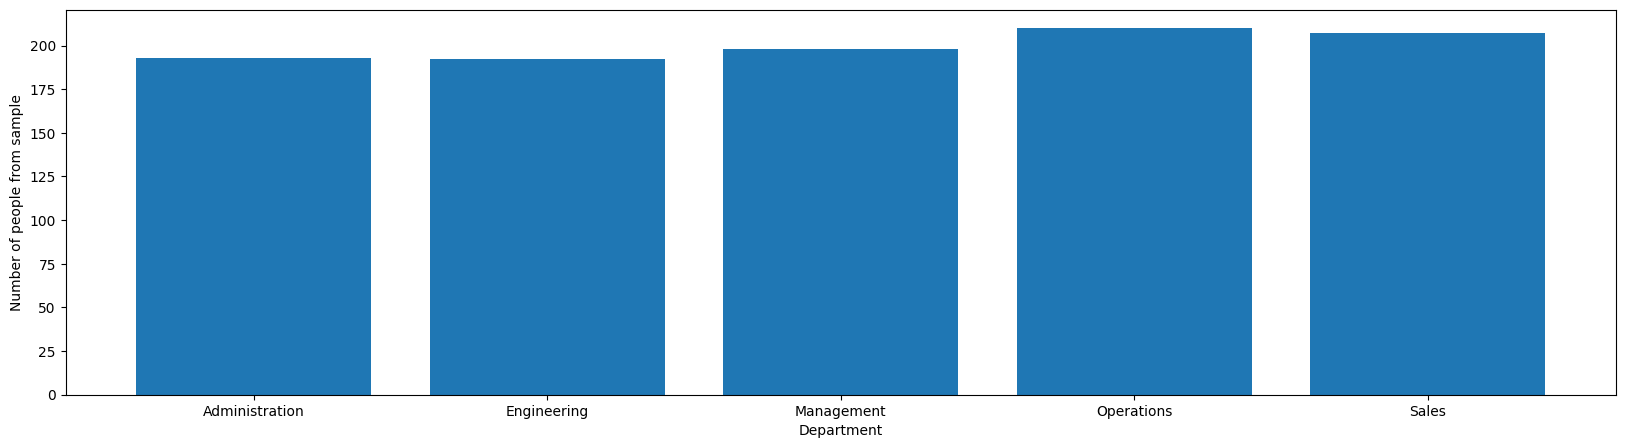

In [3]:
plt.figure(figsize=(20,5))
job_grouped = pay_data[['Dept', 'Age']].groupby('Dept').agg('count')
plt.bar(job_grouped.index.values, job_grouped['Age'].values)
plt.xticks(job_grouped.index.values)
plt.xlabel('Department')
plt.ylabel('Number of people from sample')
plt.show()

### Job Titles by Total entries

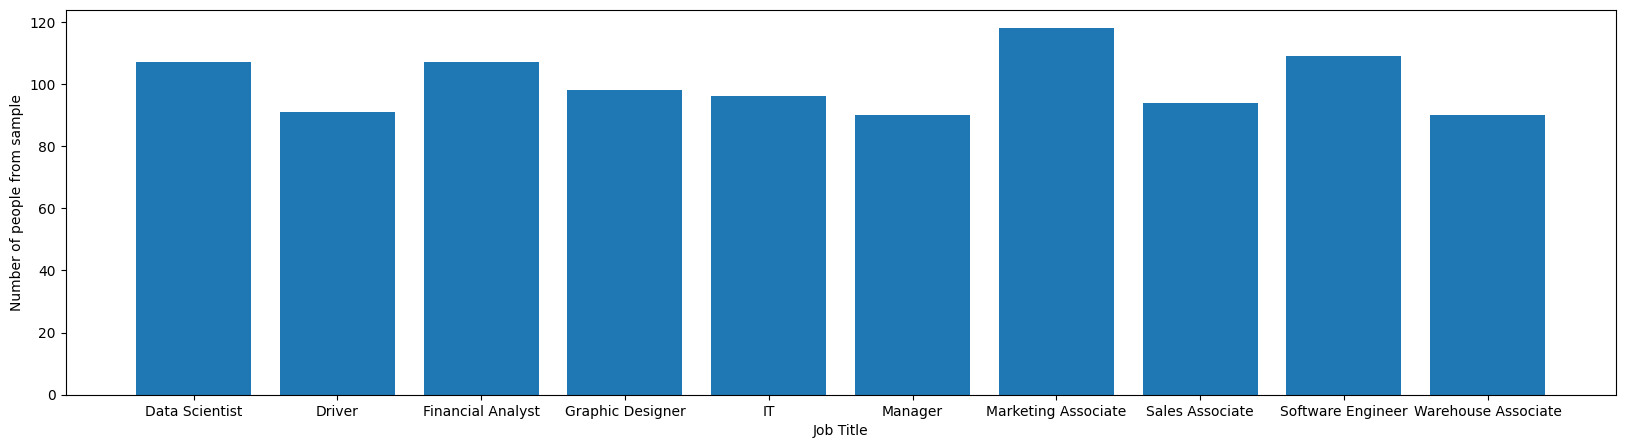

In [4]:
plt.figure(figsize=(20,5))
job_grouped = pay_data[['JobTitle', 'Age']].groupby('JobTitle').agg('count')
plt.bar(job_grouped.index.values, job_grouped['Age'].values)
plt.xticks(job_grouped.index.values)
plt.xlabel('Job Title')
plt.ylabel('Number of people from sample')
plt.show()

### Pay Gap by Job Title

In [5]:
male_pay_data = pay_data[pay_data['Gender'] == "Male"]
female_pay_data = pay_data[pay_data['Gender'] == "Female"]

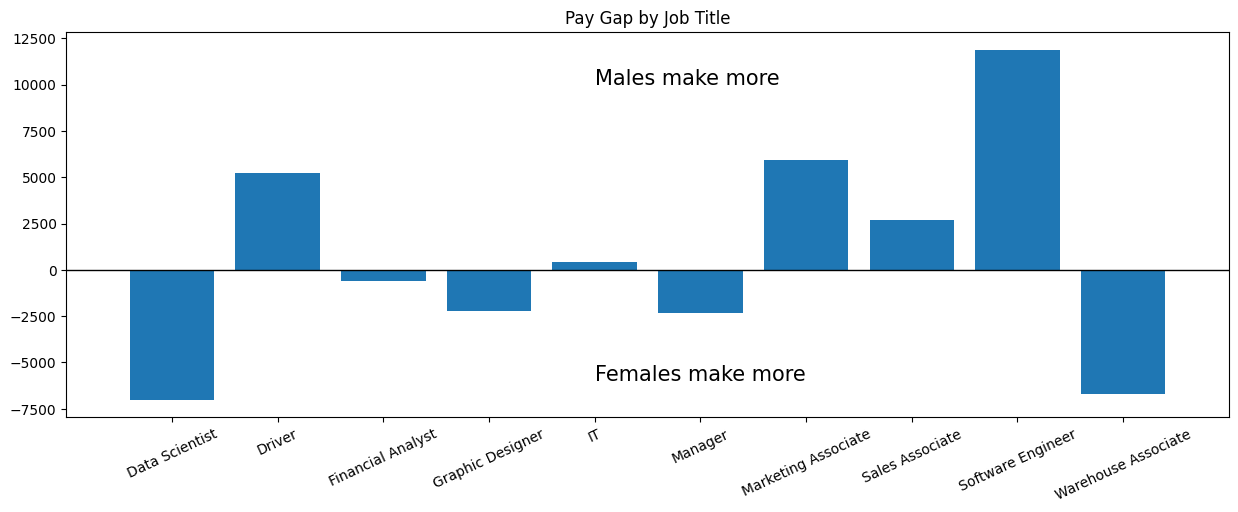

In [6]:
m_job_pay_gap = male_pay_data[['JobTitle', 'Salary']].groupby('JobTitle').agg('mean').sort_values('JobTitle')
f_job_pay_gap = female_pay_data[['JobTitle', 'Salary']].groupby('JobTitle').agg('mean').sort_values('JobTitle')

job_pay_diff = m_job_pay_gap.copy()
job_pay_diff['Salary'] = job_pay_diff['Salary'] - f_job_pay_gap['Salary']

plt.figure(figsize=(15,5))
plt.bar(job_pay_diff.index.values, job_pay_diff['Salary'].values)
plt.xticks(rotation = 25)
plt.title('Pay Gap by Job Title')
plt.text(4,10000, 'Males make more', fontsize=15)
plt.text(4,-6000, 'Females make more', fontsize=15)
plt.plot(np.arange(-1,11), np.zeros(12), color='black', linewidth=1)
plt.xlim(left=-1 ,right=10)
plt.show()

### Pay Gap by Education Level

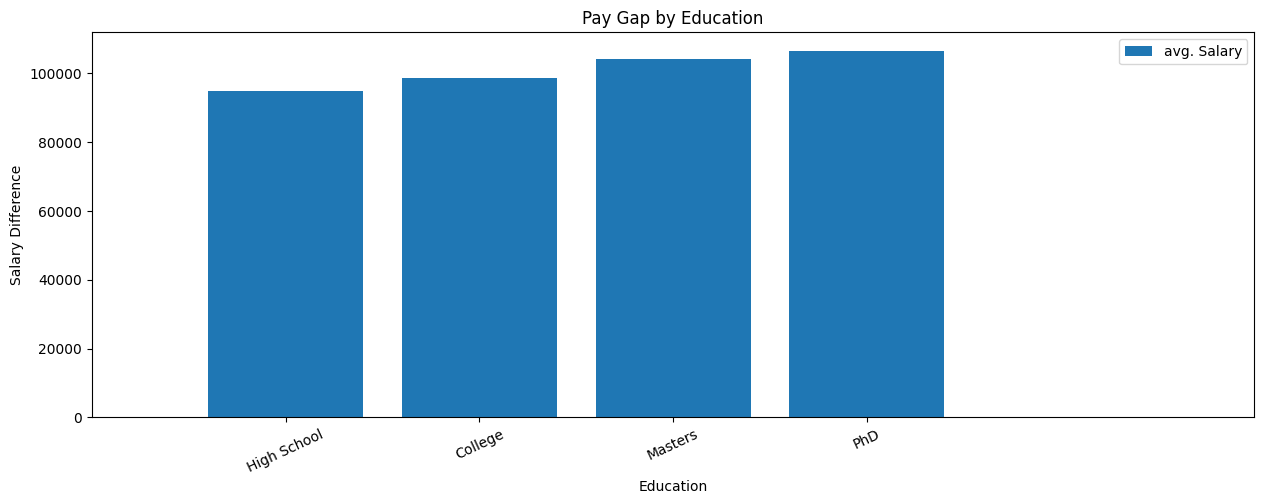

In [7]:
educ_pay_gap = pay_data[['Education', 'Salary']].groupby('Education').agg('mean').sort_values('Education')

educ_pay_gap['Education'] = educ_pay_gap.index.values
educ_pay_gap = educ_pay_gap.set_index(pd.Index([1,0,2,3])).sort_index()



plt.figure(figsize=(15,5))
plt.bar(educ_pay_gap['Education'].values, educ_pay_gap['Salary'].values, label='avg. Salary')
plt.xticks(rotation = 25)
plt.title('Pay Gap by Education')
plt.xlim(left=-1 ,right=5)
plt.xlabel('Education')
plt.ylabel('Salary Difference')
plt.legend()
plt.show()

### Gender pay gap by Education Level

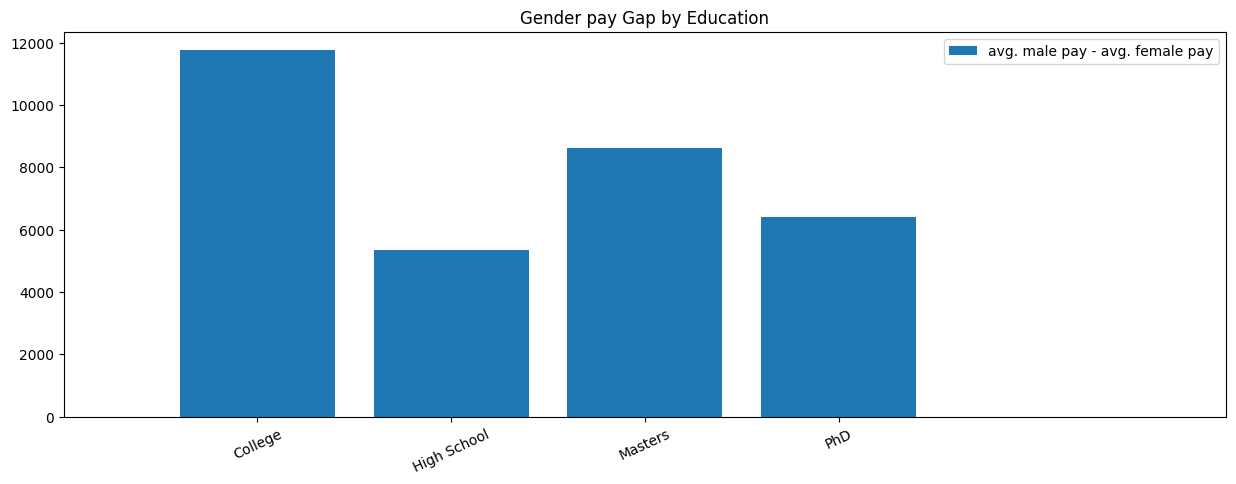

In [8]:
m_educ_pay_gap = male_pay_data[['Education', 'Salary']].groupby('Education').agg('mean').sort_values('Education')
f_educ_pay_gap = female_pay_data[['Education', 'Salary']].groupby('Education').agg('mean').sort_values('Education')

educ_pay_diff = m_educ_pay_gap.copy()
educ_pay_diff['Salary'] = educ_pay_diff['Salary'] - f_educ_pay_gap['Salary']

plt.figure(figsize=(15,5))
plt.bar(educ_pay_diff.index.values, educ_pay_diff['Salary'].values, label='avg. male pay - avg. female pay')
plt.xticks(rotation = 25)
plt.title('Gender pay Gap by Education')
plt.xlim(left=-1 ,right=5)
plt.legend()
plt.show()

### Is Salary distributed normally?

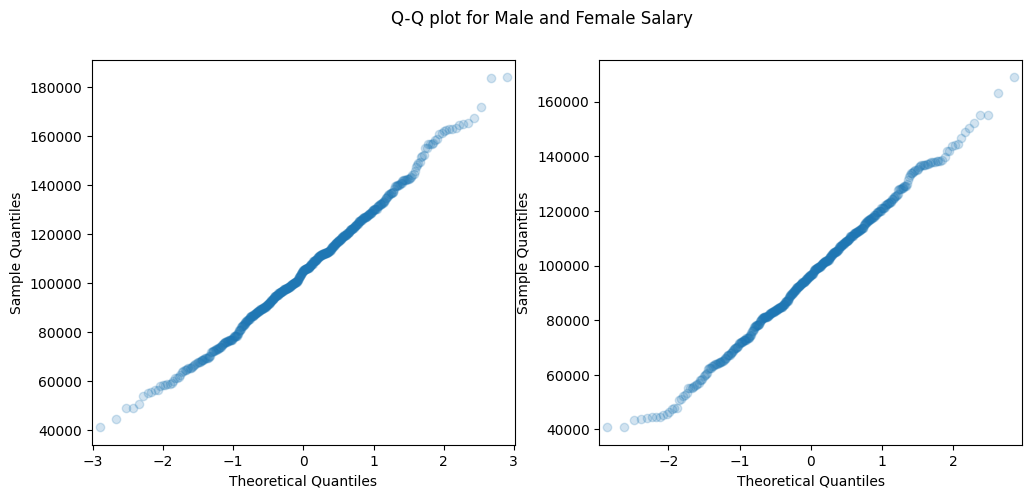

In [9]:
figure, axes = plt.subplots(1, 2, figsize=(12,5))
sm.qqplot(male_pay_data['Salary'], alpha = 0.2, ax=axes[0])
sm.qqplot(female_pay_data['Salary'], alpha = 0.2,ax=axes[1])
figure.suptitle('Q-Q plot for Male and Female Salary', axes=axes[0])
plt.show()

In [179]:
#Test Normality
print(stats.normaltest(male_pay_data['Salary'].values).pvalue)
print(stats.normaltest(female_pay_data['Salary'].values).pvalue)

0.09859357151939412
0.2720276969263989


In [180]:
#Test homoscedasticity
print(stats.levene(male_pay_data['Salary'].values, female_pay_data['Salary'].values).pvalue)

0.40326685397614803


### T-test

In [121]:
ttest = stats.ttest_ind(male_pay_data['Salary'].values, female_pay_data['Salary'].values)
print(ttest.pvalue)

8.000016978237565e-08


## Regression Analysis

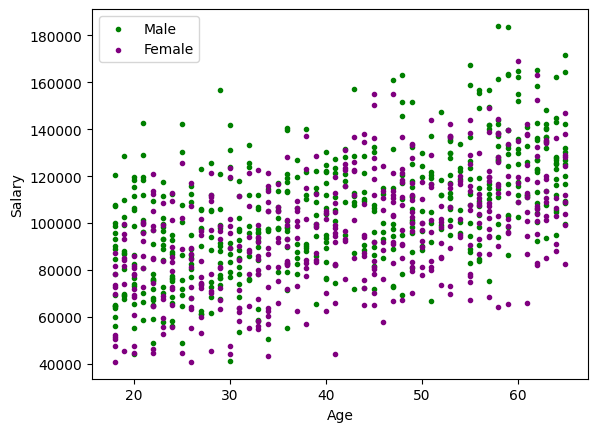

In [181]:
plt.scatter(male_pay_data['Age'].values, male_pay_data['Salary'].values, color='green', marker='.', label='Male')
plt.scatter(female_pay_data['Age'].values, female_pay_data['Salary'].values, color='purple', marker='.', label='Female')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [147]:
print('Correlation coeff Male: ', male_pay_data[['Age', 'Salary']].corr()['Salary'].iloc[0], sep='')
print('Correlation coeff Female: ', female_pay_data[['Age', 'Salary']].corr()['Salary'].iloc[0], sep='')

Correlation coeff Male: 0.5729396229895339
Correlation coeff Female: 0.513240272874742


In [201]:
from sklearn.linear_model import LinearRegression

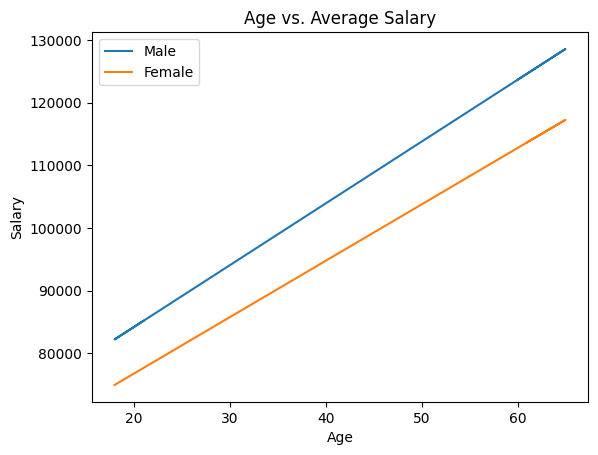

In [200]:
linregress_model_1 = LinearRegression(fit_intercept=True)

X = male_pay_data['Age'].values.reshape(-1,1)
y = male_pay_data['Salary'].values.T

linregress_model_1.fit(X,y)

plt.plot(X,linregress_model_1.predict(X))

X = female_pay_data['Age'].values.reshape(-1,1)
y = female_pay_data['Salary'].values

linregress_model_2 = LinearRegression(fit_intercept=True)

linregress_model_2.fit(X,y)

plt.plot(X,linregress_model_2.predict(X))

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(['Male', 'Female'])
plt.title('Age vs. Average Salary')
plt.show()

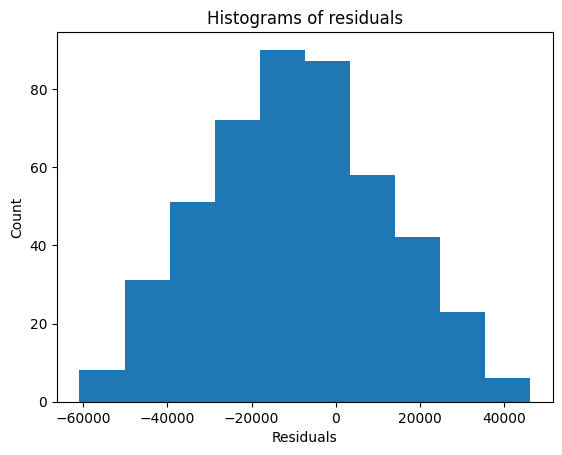

In [150]:
m_residuals = y - (linregress_model_1.coef_[0]*X.reshape(468,) + linregress_model_1.intercept_)
plt.hist(m_residuals)
plt.title('Histograms of residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()

In [151]:
m_slope = linregress_model_1.coef_[0]
m_intercept = linregress_model_1.intercept_
f_slope = linregress_model_2.coef_[0]
f_intercept = linregress_model_2.intercept_

linregress_intersect_x = int(np.round((f_intercept - m_intercept) / (m_slope - f_slope)))
dataset_creation = 2019

print('The gender gap will close for people born in ', dataset_creation - linregress_intersect_x, ' if the same trend continues', sep='')

The gender gap will close for people born in 2085 if the same trend continues
